### '삶의 만족도가 높은 도시' - 왜 삶의 만족도가 높을까
[시도별 인프라 시설 분포]
- 1. 인구대비 의료기관 분포
- 2. 인구대비 문화시설 분포
- 3. 인구대비 대형점포 분포                                

[모듈 로딩] <hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

[인구 수 데이터 전처리] <hr>

In [2]:
# 조사할 데이터 컬럼
regions_to_keep = ['대전광역시', '충청남도', '서울특별시', '전라북도', '부산광역시', '대구광역시', '경기도', '인천광역시']


1. 인구대비 시도별 의료기관 분포 <hr>

In [3]:
# 데이터 로딩
FILE_NAME = '../data/공공의료기관 현황_일반현황_20231231.csv'

hopitalDF=pd.read_csv(FILE_NAME)
hopitalDF.head()

,연번,의료기관명,요양종별,관계 행정기관,근거 법령,설립형태,응급지정,허가병상수,주소,홈페이지,대표전화,FAX
0,1,서울대학교병원,상급종합병원,교육부,서울대학교병원 설치법,공립(기타),권역응급의료센터,1803,서울특별시 종로구 대학로 101 (연건동),www.snuh.org,1588-5700,1588-5700
1,2,서울적십자병원,종합병원,대한적십자사,대한적십자사 조직법,공립(기타),지역응급의료기관,292,"서울특별시 종로구 새문안로 9, 적십자병원 (평동)",www.rch.or.kr/seoul,02-2002-8000,02-2002-8000
2,3,서울특별시 동부병원,종합병원,서울특별시,서울특별시 시립병원 설치 및 운영에 관한조례,공립(시군구립),지역응급의료기관,201,서울특별시 동대문구 무학로 124 (용두동),www.dbhosp.go.kr,02-920-9114,02-920-9114
3,4,경찰병원,종합병원,경찰청,경찰청과 그 소속기관 직제,국립,지역응급의료기관,380,"서울특별시 송파구 송이로 123, 국립경찰병원 (가락동)",www.nph.go.kr,02-3400-1114,02-3400-1114
4,5,한국보훈복지의료공단 중앙보훈병원,종합병원,국가보훈처,한국보훈복지의료공단법,공립(기타),지역응급의료센터,985,서울특별시 강동구 진황도로61길 53 (둔촌동),http://seoul.bohun.or.kr,02-2225-1114,02-2225-1114


전처리

In [4]:
import re

# 패턴 정의
patterns = [
    (r'서울특별시|서울시|서울', '서울특별시'),
    (r'부산광역시|부산시|부산', '부산광역시'),
    (r'대구광역시|대구시|대구', '대구광역시'),
    (r'인천광역시|인천시|인천', '인천광역시'),
    (r'광주광역시|광주시|광주', '광주광역시'),
    (r'대전광역시|대전시|대전', '대전광역시'),
    (r'울산광역시|울산시|울산', '울산광역시'),
    (r'세종특별자치시|세종시|세종', '세종특별자치시'),
    (r'경기도|경기', '경기도'),
    (r'강원도|강원특별자치도|강원', '강원특별자치도'),
    (r'충청북도|충북도|충북|충청북', '충청북도'),
    (r'충청남도|충남도|충남|충청남', '충청남도'),
    (r'전라북도|전북도|전북|전라북|전북특별자치도', '전라북도'),
    (r'전라남도|전남도|전남|전라남', '전라남도'),
    (r'경상북도|경북도|경북|경상북', '경상북도'),
    (r'경상남도|경남도|경남|경상남', '경상남도'),
    (r'제주특별자치도|제주도|제주', '제주특별자치도'),
]

def get_region(address):
    if pd.isna(address) or str(address).strip() == '' or str(address).strip() == '미기입':
        return '미기입'
    
    address = str(address).strip()
    
    for pattern, region_name in patterns:
        if re.search(pattern, address):
            return region_name
    
    return '미기입'

In [5]:
hopitalDF = hopitalDF.loc[:, ['의료기관명', '주소']]

# 시도 컬럼 추가
hopitalDF['주소'] = hopitalDF['주소'].apply(get_region)

# 결과 확인
display(hopitalDF.head())

# groupby
hopitalDF = hopitalDF.groupby('주소').size().reset_index(name='의료기관수')
display(hopitalDF.head())

,의료기관명,주소
0,서울대학교병원,서울특별시
1,서울적십자병원,서울특별시
2,서울특별시 동부병원,서울특별시
3,경찰병원,서울특별시
4,한국보훈복지의료공단 중앙보훈병원,서울특별시


,주소,의료기관수
0,강원특별자치도,18
1,경기도,31
2,경상남도,20
3,경상북도,25
4,광주광역시,9


In [6]:
# 인구 수 대비 데이터 분석
# 데이터 로딩
FILE_NAME2 = '../data/주민등록인구_24_9.csv'

populationDF = pd.read_csv(FILE_NAME2)
display(populationDF.head())

,행정구역별,2025.09
0,서울특별시,9318500
1,부산광역시,3248359
2,대구광역시,2356372
3,인천광역시,3046754
4,광주광역시,1397122


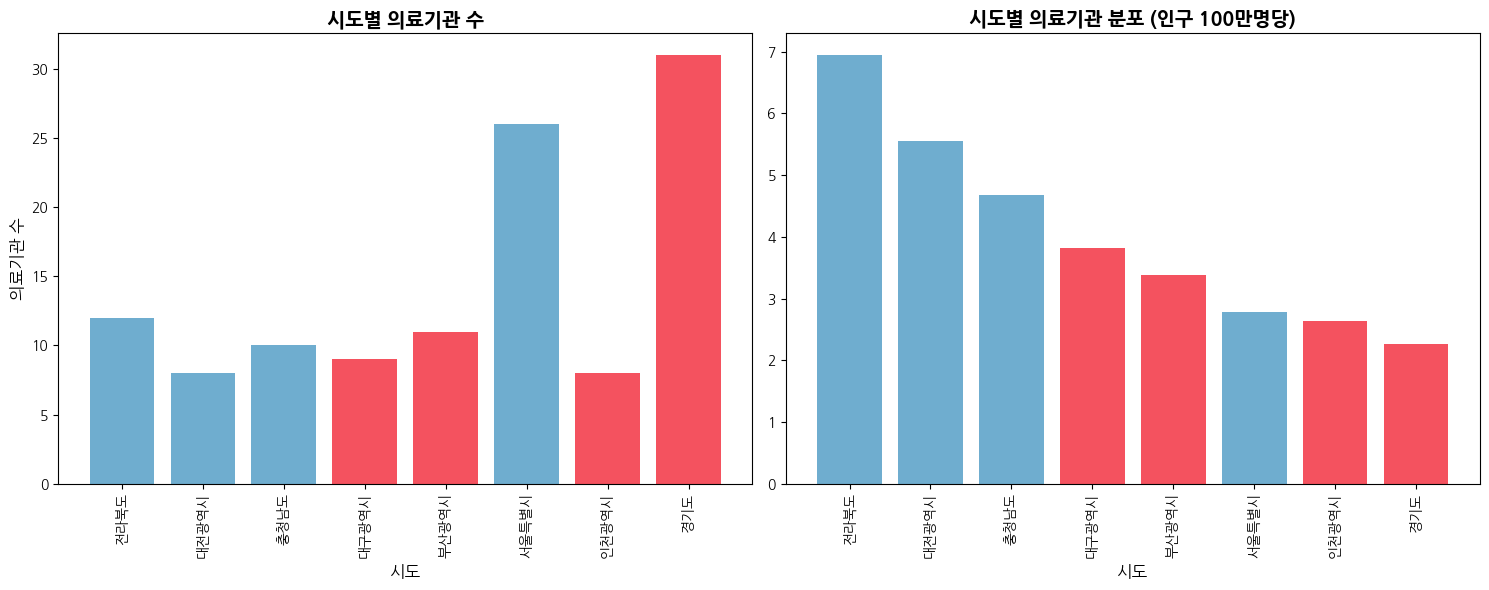

In [7]:
# ------------------------------------------------------------------------------------------------------------------------
# 인구 데이터 처리
# ------------------------------------------------------------------------------------------------------------------------
population_by_region = populationDF.copy()

if population_by_region.columns[0] != '주소':
    population_by_region['주소'] = population_by_region.iloc[:, 0].apply(get_region)

population_summary = population_by_region.groupby('주소').agg({
                     population_by_region.columns[1]: 'sum'}).reset_index()
population_summary.columns = ['주소', '인구수']

# 데이터 병합
merged_data = pd.merge(hopitalDF, population_summary, on='주소', how='left')

# 지표 계산
merged_data['인구100만당의료기관수'] = (merged_data['의료기관수'] / (merged_data['인구수'] / 1000000)).round(2)

# 지표 정렬
# 의료기관수로 내림차순 정렬
merged_data = merged_data.sort_values(by='인구100만당의료기관수', ascending=False).reset_index(drop=True)

# 최종분석 데이터
# display(merged_data)

# CSV 저장
merged_data.to_csv('hospital_population_analysis.csv', index=False, encoding='utf-8-sig')

# 상위 4개, 하위 4개 도시만 필터링
merged_data = merged_data[merged_data['주소'].isin(regions_to_keep)]
# ------------------------------------------------------------------------------------------------------------------------
# 시각화 (1행 2열) - 2개 그래프만
# ------------------------------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

color_map = {
    '대전광역시': '#6FADCF',
    '충청남도': '#6FADCF',
    '서울특별시': '#6FADCF',
    '전라북도': '#6FADCF',
    '부산광역시': '#F4525F',
    '대구광역시': '#F4525F',
    '경기도': '#F4525F',
    '인천광역시': '#F4525F',
}

bar_colors = [color_map.get(addr, 'skyblue') for addr in merged_data['주소']]

# 1. 시도별 의료기관 수
axes[0].bar(merged_data['주소'], merged_data['의료기관수'], color=bar_colors)
axes[0].set_title('시도별 의료기관 수', fontsize=14, fontweight='bold')
axes[0].set_ylabel('의료기관 수', fontsize=12)
axes[0].set_xlabel('시도', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# 2. 인구 100만 명당 의료기관 수 (인구 수 대비 지표)
axes[1].bar(merged_data['주소'], merged_data['인구100만당의료기관수'], color=bar_colors)
axes[1].set_title('시도별 의료기관 분포 (인구 100만명당)', fontsize=14, fontweight='bold')
# axes[1].set_ylabel('의료기관 수', fontsize=12)
axes[1].set_xlabel('시도', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('hospital_population_analysis1.png', dpi=300, bbox_inches='tight')
plt.show()

2. 인구대비 시도별 문화시설 분포 <hr>

In [8]:
# 1	    CTPRVN_NM	        시도명	
# 2	    SIGNGU_NM	        시군구명	
# 3	    ADSTRD_CD	        행정동코드		
# 4	    LBRRY_CO	        도서관수		
# 5 	MUSEUM_CO	        박물관수		
# 6 	ARTGR_CO	        미술관수		
# 7	    CULTCNTR_CO	        문예회관수	
# 8	    LCLT_CULTINS_CO	    지방문화원수		
# 9	    CULTHS_CO	        문화의집수		
# 10	AREA_CULTFNDTN_CO		
# 11	SAFE_FCLTY_CO	    안전시설수	
# 12	POPLTN_CO	        인구수	
# 13	FILE_NM	            파일명	
# 14	BASE_DE	            기준일자	

In [9]:
# 데이터 로딩
FILE_NAME = '../data/한국문화정보원_24.csv'

cultureDF=pd.read_csv(FILE_NAME)
cultureDF.head()

,CTPRVN_NM,SIGNGU_NM,ADSTRD_CD,LBRRY_CO,MUSEUM_CO,ARTGR_CO,CULTCNTR_CO,LCLT_CULTINS_CO,CULTHS_CO,AREA_CULTFNDTN_CO,SAFE_FCLTY_CO,POPLTN_CO,FILE_NM,BASE_DE
0,서울특별시,용산구,1117062500,0,2,1,0,0,0,0,4,232639,KC_621_CTLSTT_SAFE_MAP_2024,20250410
1,서울특별시,종로구,1111051500,1,2,1,0,0,0,0,3,167487,KC_621_CTLSTT_SAFE_MAP_2024,20250410
2,경기도,파주시,4148032000,1,10,3,0,0,0,0,2,393186,KC_621_CTLSTT_SAFE_MAP_2024,20250410
3,서울특별시,종로구,1111061500,0,10,3,0,0,0,0,6,167487,KC_621_CTLSTT_SAFE_MAP_2024,20250410
4,서울특별시,용산구,1117069000,0,1,0,0,0,0,0,1,232639,KC_621_CTLSTT_SAFE_MAP_2024,20250410


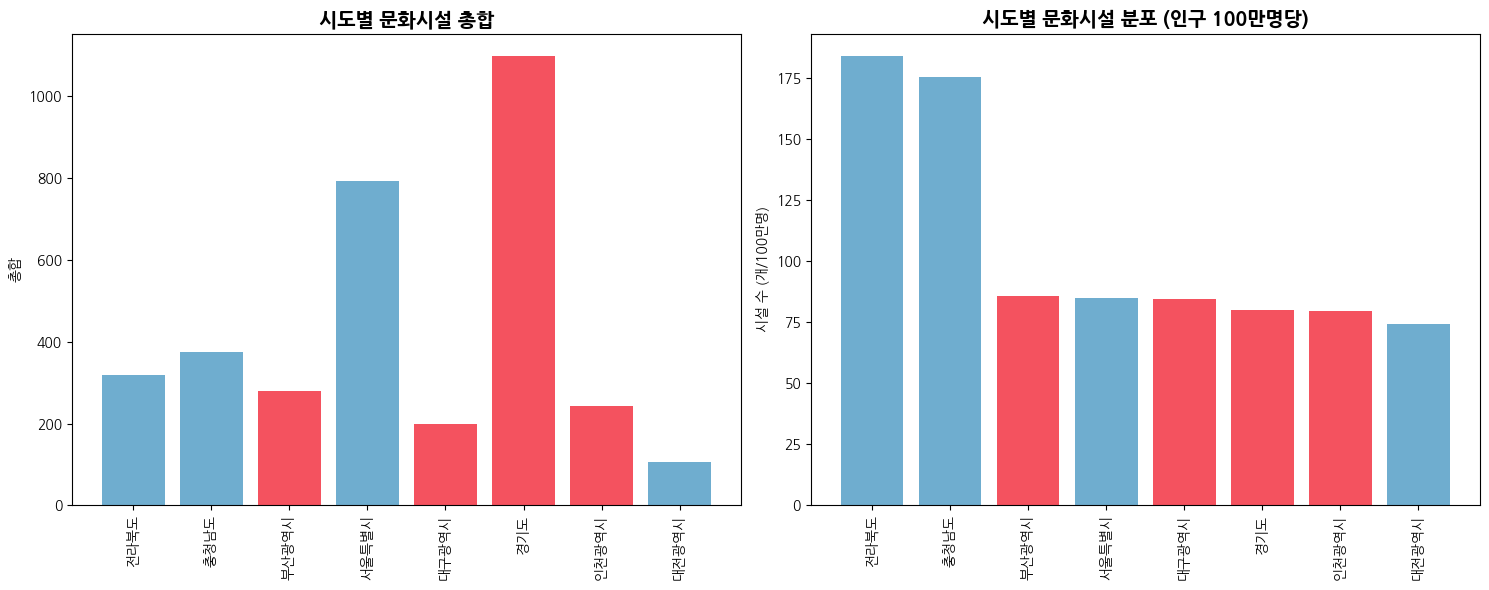

In [10]:
# ------------------------------------------------------------------------------------------------------------------------
# 0) 컬럼 준비
facility_columns = ['LBRRY_CO','MUSEUM_CO','ARTGR_CO','CULTCNTR_CO','LCLT_CULTINS_CO','CULTHS_CO','SAFE_FCLTY_CO']

# 한글 컬럼 매핑
rename_map = {
    'CTPRVN_NM': '시도명',
    'SIGNGU_NM': '시군구명',
    'ADSTRD_CD': '행정동코드',
    'LBRRY_CO': '도서관수',
    'MUSEUM_CO': '박물관수',
    'ARTGR_CO': '미술관수',
    'CULTCNTR_CO': '문예회관수',
    'LCLT_CULTINS_CO': '지방문화원수',
    'CULTHS_CO': '문화의집수',
    'AREA_CULTFNDTN_CO': '지역문화재단수',
    'SAFE_FCLTY_CO': '안전시설수',
    'POPLTN_CO': '인구수',
    'FILE_NM': '파일명',
    'BASE_DE': '기준일자'
}

# 한글 컬럼으로 rename
cultureDF = cultureDF.rename(columns=rename_map)

# 시설 컬럼 리스트(시도명 제외)
facility_cols_kr = ['도서관수','박물관수','미술관수','문예회관수','지방문화원수','문화의집수','안전시설수']

# 결측치 값 확인
# print(cultureDF.isnull().sum())

# ------------------------------------------------------------------------------------------------------------------------
# 1) 각 행 총합
cultureDF['총합'] = cultureDF[facility_cols_kr].sum(axis=1)

# ------------------------------------------------------------------------------------------------------------------------
# 2) 시도별 집계 → result 생성
result = cultureDF.groupby('시도명')[facility_cols_kr].sum().reset_index()
result['총합'] = result[facility_cols_kr].sum(axis=1)

# ------------------------------------------------------------------------------------------------------------------------
# 3) 인구 요약 준비 → population_summary
_pop_col = populationDF.columns[1]  # 첫 번째 수치 컬럼이 인구수라고 가정
population_summary = populationDF.groupby('행정구역별')[_pop_col].sum().reset_index()
population_summary.columns = ['시도명', '인구수']

# ------------------------------------------------------------------------------------------------------------------------
# 4) 병합 → merged_data (이후부터는 merged_data만 사용)
merged_data = pd.merge(result, population_summary, on='시도명', how='left')

# ------------------------------------------------------------------------------------------------------------------------
# 상위 4개, 하위 4개 도시만 필터링
merged_data = merged_data[merged_data['시도명'].isin(regions_to_keep)]

# ------------------------------------------------------------------------------------------------------------------------
# 5) 100만명당 계산 (한글 컬럼으로 생성)
for col in facility_cols_kr:
    merged_data[f'{col}_100만명당'] = (merged_data[col] / (merged_data['인구수'] / 1000000)).round(2)

merged_data['총합_100만명당'] = (merged_data['총합'] / (merged_data['인구수'] / 1000000)).round(2)

# 5-1) 인구 100만명당 총합 기준 정렬
merged_data = merged_data.sort_values(by='총합_100만명당', ascending=False).reset_index(drop=True)

# display(merged_data)

# ------------------------------------------------------------------------------------------------------------------------
# 6) 시각화 (절대값)
color_map = {
    '대전광역시': '#6FADCF',
    '충청남도': '#6FADCF',
    '서울특별시': '#6FADCF',
    '전라북도': '#6FADCF',
    '부산광역시': '#F4525F',
    '대구광역시': '#F4525F',
    '경기도': '#F4525F',
    '인천광역시': '#F4525F',
}

bar_colors = [color_map.get(addr, 'skyblue') for addr in merged_data['시도명']]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(merged_data['시도명'], merged_data['총합'], color=bar_colors)
axes[0].set_title('시도별 문화시설 총합', fontsize=14, fontweight='bold')
axes[0].set_ylabel('총합')
axes[0].tick_params(axis='x', rotation=90)

# 100만명당 인구 대비 비교 차트
axes[1].bar(merged_data['시도명'], merged_data['총합_100만명당'], color=bar_colors)
axes[1].set_title('시도별 문화시설 분포 (인구 100만명당)', fontsize=14, fontweight='bold')

axes[1].set_ylabel('시설 수 (개/100만명)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('cultural_facilities_per_million.png', dpi=300, bbox_inches='tight')
plt.show()
